# Exploring different Techniques to Improve Perfomance

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve
)

In [26]:
data = pd.read_csv("../dataset/Rainfall.csv")
data.sample(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
10,11,1016.5,20.4,18.1,16.5,16.4,90,90,yes,2.1,40.0,23.3
67,8,1012.5,21.5,20.1,18.9,18.9,93,88,no,0.3,40.0,15.3
260,17,1014.6,30.6,28.2,27.1,24.2,79,72,yes,7.1,70.0,27.4
139,19,1009.9,28.1,25.5,24.0,22.5,84,85,yes,3.5,70.0,26.4
47,17,1024.1,14.4,12.9,11.6,8.9,77,91,yes,0.0,20.0,19.2
275,2,1012.4,31.6,27.9,26.5,23.1,76,82,yes,4.2,10.0,30.6
133,13,1012.4,27.8,25.5,24.4,22.2,82,88,yes,1.2,50.0,24.9
288,15,1015.2,28.7,25.2,23.1,20.7,76,19,no,9.1,90.0,14.1
229,17,1008.2,32.4,29.9,28.3,26.6,83,81,yes,8.4,230.0,20.5
134,14,1014.2,27.7,25.4,24.0,23.4,89,86,yes,2.8,70.0,28.3


In [27]:
data = data.drop("day", axis=1)
data.sample(10)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
111,1012.5,28.4,24.6,22.0,22.3,87,80,yes,4.8,30.0,7.3
92,1015.6,23.8,21.3,19.8,19.6,90,81,yes,1.5,40.0,14.5
128,1011.4,31.2,28.7,27.3,25.2,82,80,no,3.8,150.0,9.5
136,1011.2,27.1,24.8,22.5,19.4,73,69,yes,7.2,10.0,21.9
7,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
308,1018.1,26.6,24.7,23.1,20.4,77,83,yes,3.0,80.0,29.8
81,1013.4,17.3,16.6,15.9,16.0,96,100,yes,0.0,50.0,33.5
87,1024.1,19.9,16.9,15.2,10.0,65,58,no,5.6,60.0,26.9
42,1013.4,21.6,19.2,17.6,18.5,95,86,yes,0.6,30.0,13.9
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9


In [28]:
data = data.replace(
    {"yes": 1, "no": 0}
)
data.sample(10)

/tmp/ipykernel_15889/3842200534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
329,1017.7,25.3,22.6,18.2,16.8,70,44,0,6.9,20.0,28.6
160,1005.7,31.7,28.2,26.6,25.7,86,79,1,6.5,NaN,NaN
17,1017.1,17.8,15.2,11.9,11.1,76,49,0,3.9,50.0,28.4
81,1013.4,17.3,16.6,15.9,16.0,96,100,1,0.0,50.0,33.5
7,1020.8,21.0,18.4,16.5,14.4,78,28,0,7.7,60.0,14.3
359,1020.4,21.4,18.2,16.1,13.5,75,89,1,0.7,10.0,27.6
316,1017.3,24.2,23.9,23.6,21.1,84,88,1,0.0,80.0,41.4
283,1013.7,26.6,24.3,21.1,19.9,77,85,1,0.6,20.0,30.2
120,1012.2,23.4,22.5,20.8,18.7,80,89,1,0.3,60.0,27.0
24,1032.6,10.8,7.4,4.3,3.7,46,25,0,10.1,20.0,28.7


In [29]:
data.columns

Index(['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [30]:
data.columns = data.columns.str.strip()
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [31]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [32]:
# filling the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [33]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [34]:
# dropping temperature files t avoid multicolinearity
data = data.drop(columns=["maxtemp", "mintemp", "dewpoint"])
data.sample(10)

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
348,1016.6,20.4,82,84,1,0.4,50.0,20.3
198,1008.5,30.6,78,69,0,9.2,230.0,23.7
67,1012.5,20.1,93,88,0,0.3,40.0,15.3
364,1025.3,17.3,78,86,1,1.2,20.0,20.9
91,1014.5,21.9,86,83,0,3.6,50.0,8.3
162,1005.9,26.6,93,85,1,0.0,230.0,20.0
62,1020.9,18.7,75,46,0,10.0,40.0,14.7
339,1018.4,18.4,85,91,1,0.1,70.0,41.3
281,1010.5,27.8,76,54,0,10.6,300.0,13.0
362,1026.6,17.3,75,85,1,1.0,20.0,25.9


In [35]:
X, y = data.drop("rainfall", axis=1), data["rainfall"]
print(X.shape)

(366, 7)


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64

In [37]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=21
)
print(X_train.shape, X_test.shape)

(292, 7) (74, 7)


In [38]:
# Define classifiers to compare
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42)
}

results = []

for clf_name, clf in classifiers.items():
    # Create pipeline for each classifier
    pipe = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Train and evaluate
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Model': pipe
    })
    
    print(f"{clf_name}: {accuracy:.4f}")

# Compare results
results_df = pd.DataFrame(results)
print("\nComparison:")
print(results_df.sort_values('Accuracy', ascending=False))

RandomForest: 0.8108
LogisticRegression: 0.8243
XGBoost: 0.7432
SVM: 0.7973

Comparison:
           Classifier  Accuracy  \
1  LogisticRegression  0.824324   
0        RandomForest  0.810811   
3                 SVM  0.797297   
2             XGBoost  0.743243   

                                               Model  
1  (SMOTE(random_state=42), StandardScaler(), Log...  
0  (SMOTE(random_state=42), StandardScaler(), (De...  
3  (SMOTE(random_state=42), StandardScaler(), SVC...  
2  (SMOTE(random_state=42), StandardScaler(), XGB...  


In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# More comprehensive XGBoost parameter grid
xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='accuracy', verbose=1)
xgb_grid.fit(X_train, y_train)

print("XGBoost best params:", xgb_grid.best_params_)
print("XGBoost best score:", xgb_grid.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
XGBoost best params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
XGBoost best score: 0.7464759099516095


In [46]:
# Build pipeline only with Logistic Regression
log_reg_pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [47]:
# Fit on train
log_reg_pipe.fit(X_train, y_train)

,steps,"[('smote', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'


In [48]:
# Predict
y_pred = log_reg_pipe.predict(X_test)
y_proba = log_reg_pipe.predict_proba(X_test)[:, 1]

In [49]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

In [50]:
print("\n=== Logistic Regression Evaluation on Test Set ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


=== Logistic Regression Evaluation on Test Set ===
Accuracy: 0.8243
Precision: 0.9111
Recall: 0.8200
F1 Score: 0.8632
ROC-AUC: 0.8792
PR-AUC: 0.9334

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        24
           1       0.91      0.82      0.86        50

    accuracy                           0.82        74
   macro avg       0.80      0.83      0.81        74
weighted avg       0.84      0.82      0.83        74



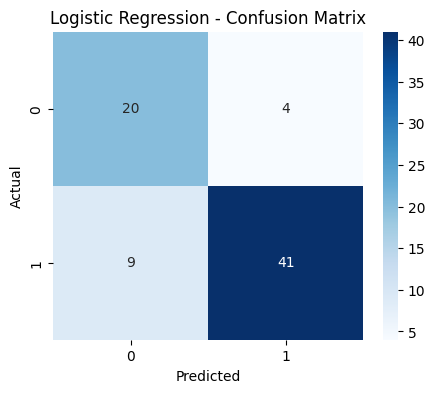

In [51]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

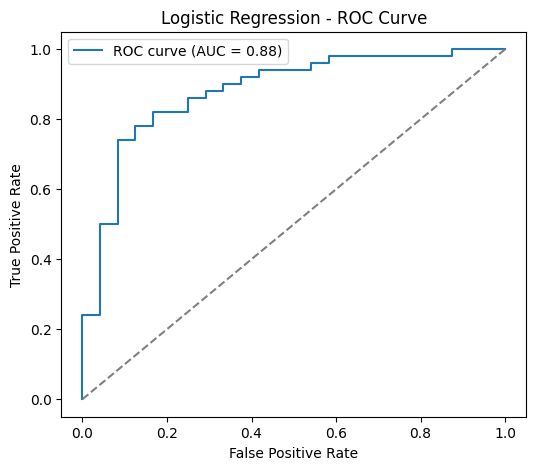

In [52]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

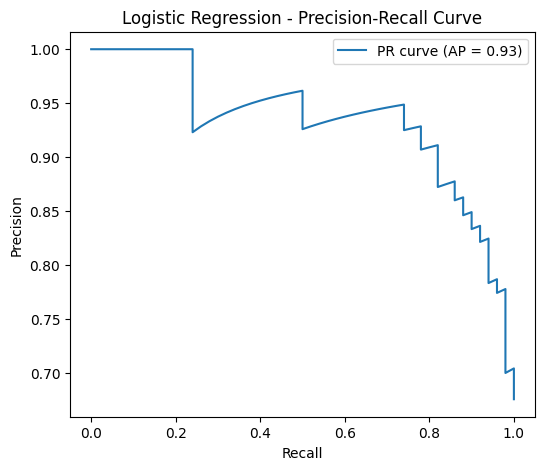

In [53]:
# Precision-Recall curve
prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(rec_curve, prec_curve, label=f"PR curve (AP = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic Regression - Precision-Recall Curve")
plt.legend()
plt.show()

In [56]:
# Extract already-fitted scaler + classifier (do NOT refit scaler again!)
scaler = log_reg_pipe.named_steps['scaler']
classifier = log_reg_pipe.named_steps['classifier']

# Build inference pipeline
inference_pipe = Pipeline([
    ('scaler', scaler),
    ('classifier', classifier)
])


with open("../models/logreg_rainfall_model.pkl", "wb") as f:
    pickle.dump(inference_pipe, f)

In [62]:
with open("../models/logreg_rainfall_model.pkl", "rb") as f:
    model = pickle.load(f)

In [64]:
X.columns

Index(['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [65]:
X.head()

,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,18.3,72,49,9.3,80.0,26.3
1,1022.0,18.9,81,83,0.6,50.0,15.3
2,1019.7,19.3,95,91,0.0,40.0,14.2
3,1018.9,20.6,90,88,1.0,50.0,16.9
4,1015.9,20.7,95,81,0.0,40.0,13.7


In [ ]:
# testing with a predictive system

input_data = [1015.9, 19.9, 95, 81, 0.0, 40, 13.7]
columns = X.columns.to_list()
input_df = pd.DataFrame(
    [input_data],
    columns=columns
)
prediction = model.predict(input_df)

print("Prediction Result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result: Rainfall
